In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/regression/train_data.csv
/kaggle/input/regression/test_data.csv


# Data Loading

In [32]:
df = pd.read_csv("/kaggle/input/regression/train_data.csv")

In [33]:
df.head()

,w,x,y
0,-2.5,-2.784390,0.596025
1,-2.5,-2.308732,-0.449801
2,-2.5,-3.869936,-0.301154
3,-2.5,-2.671678,0.399640
4,-2.5,6.609344,0.700448


In [34]:
df_sample = df.sample(100000)

# Plotting graphs between the features

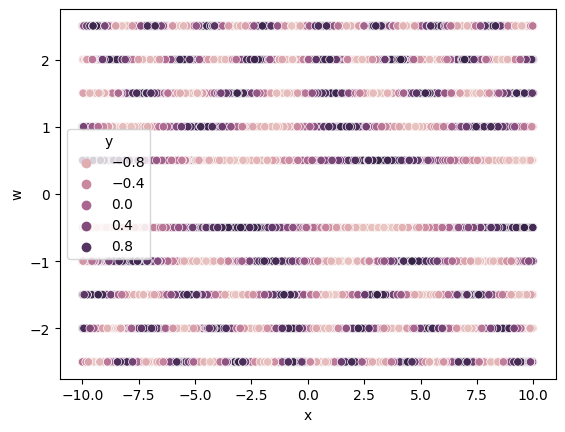

In [35]:
sns.scatterplot(data=df_sample, x='x', y='w', hue='y')
plt.show()

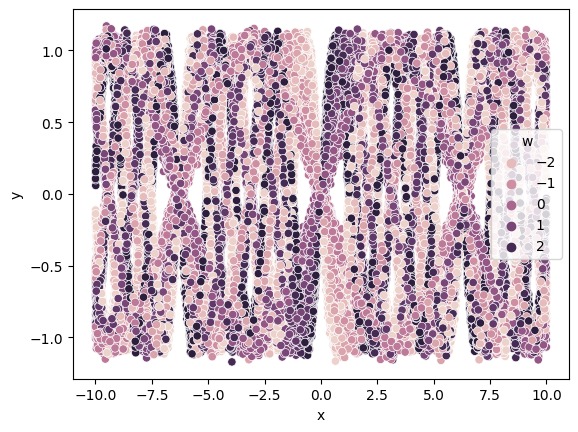

In [36]:
sns.scatterplot(data=df_sample, x='x', y='y', hue='w')
plt.show()

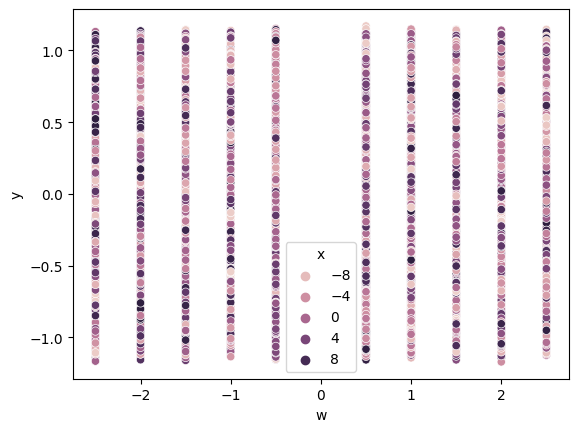

In [37]:
sns.scatterplot(data=df_sample, x='w', y='y', hue='x')
plt.show()

# Correlation Matrix to see linear dependence between the variables

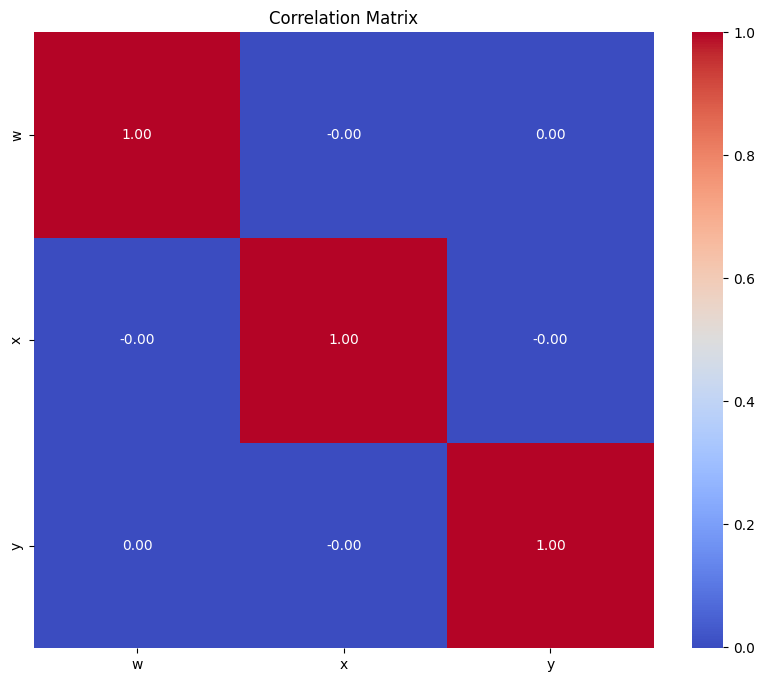

In [38]:
correlation_matrix = df_sample.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

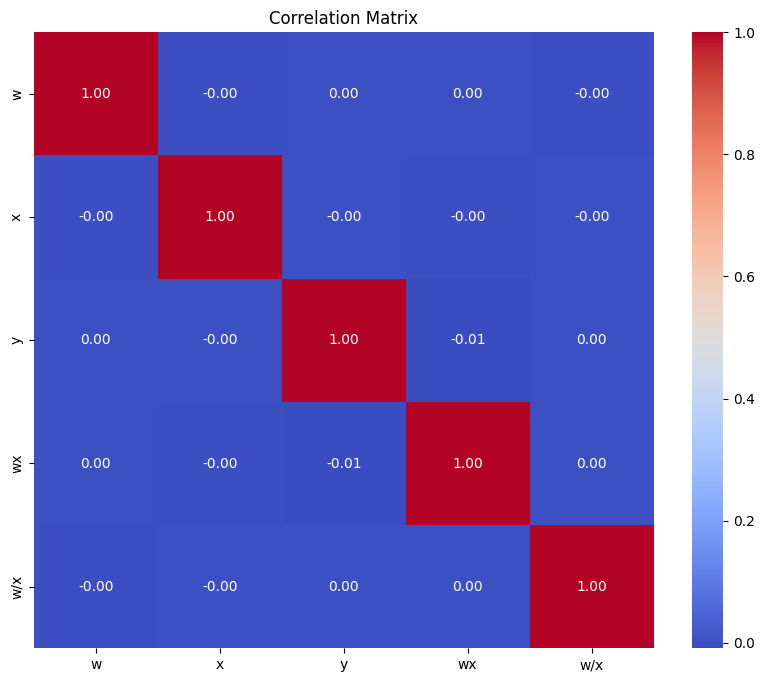

In [39]:
df_sample['wx'] = df_sample['w']*df_sample["x"]
df_sample['w/x'] = df_sample['w']/df_sample["x"]
correlation_matrix = df_sample.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Calculating Ranges of each variable

In [40]:
max(df['x']), min(df['x'])

(9.999999980324263, -9.999999752347568)

In [41]:
max(df['y']), min(df['y'])

(1.2592823435849096, -1.2498299052112347)

In [42]:
max(df['w']), min(df['w'])

(2.5, -2.5)

## We can see that all x,y,w are bounded but also that corr y, wx even though not great still non zero- could mean something- y = f(xw) or f(x)*g(w)

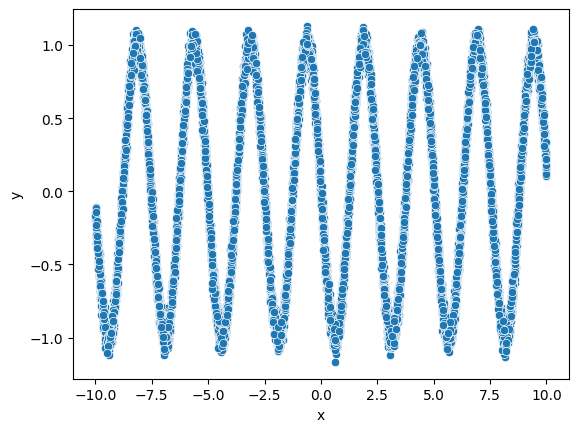

In [43]:
sns.scatterplot(data=df_sample[df_sample['w'] == -2.5], x='x', y='y')
plt.show()

## Can clearly see some sort of sinosoidal relation between y and x for fixed w.... could be y = sin/cos/ (x) * g(w) OR y = sin/cos (x*w)

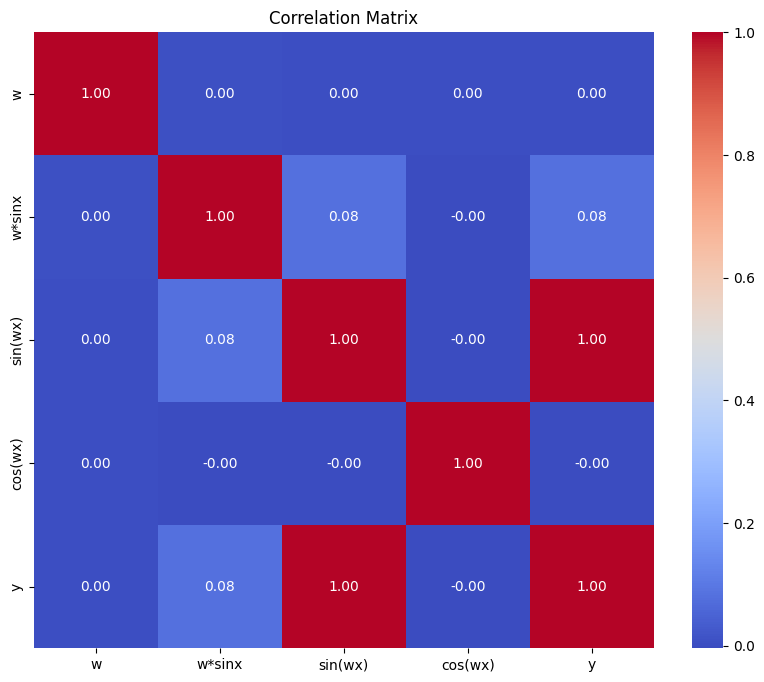

In [45]:
df_sample['sinx'] = np.sin(df_sample['x'])
df_sample['w*sinx'] = np.sin(df_sample['x']) * df_sample['w']
df_sample['sin(wx)'] = np.sin(df_sample['x'] * df_sample['w'])
df_sample['cos(wx)'] = np.cos(df_sample['x'] * df_sample['w'])

correlation_matrix = df_sample[['w', 'w*sinx', 'sin(wx)', 'cos(wx)','y']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Can very clearly see that y ~ sin(wx) or y = Asin(wx)....

In [46]:
df_sample['A'] = df_sample['y']/ df_sample["sin(wx)"] 
df_sample.describe()

,w,x,y,wx,w/x,sinx,w*sinx,sin(wx),cos(wx),A
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,-0.002645,0.010316,-0.001470,-0.014846,3.858807,0.003003,-0.004582,-0.001595,-0.029667,0.879587
std,1.658998,5.771007,0.709493,9.572595,1165.548074,0.690223,1.146452,0.707726,0.705869,45.391692
min,-2.500000,-9.999859,-1.171741,-24.998506,-8263.789600,-1.000000,-2.500000,-1.000000,-1.000000,-11953.561320
25%,-1.500000,-4.955041,-0.707808,-5.864338,-0.301249,-0.666907,-0.790315,-0.710752,-0.731435,0.944546
50%,-0.500000,0.000709,-0.004312,-0.035678,-0.050698,0.005350,-0.007585,-0.003809,-0.058931,1.000189
75%,1.500000,5.008119,0.706087,5.844323,0.298947,0.674613,0.780818,0.705947,0.675731,1.056295
max,2.500000,9.999514,1.170790,24.997723,368167.358158,1.000000,2.500000,1.000000,1.000000,4746.014490


# seems like high std, also A can be a function of w

In [50]:
df_sample['A(w)'] = (df_sample['y'] / df_sample['sin(wx)'])

<Axes: xlabel='w', ylabel='A(w)'>

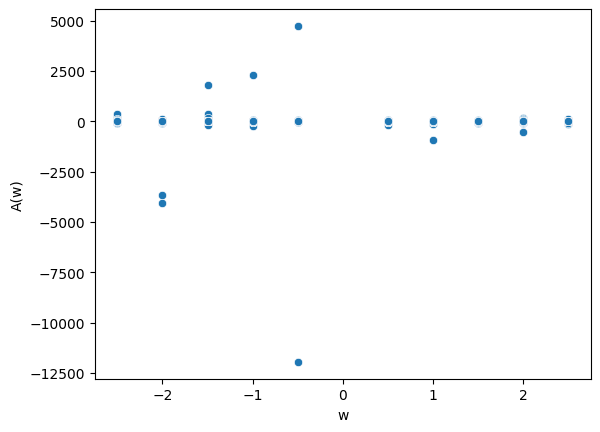

In [51]:
sns.scatterplot(data = df_sample, x = 'w', y = 'A(w)')

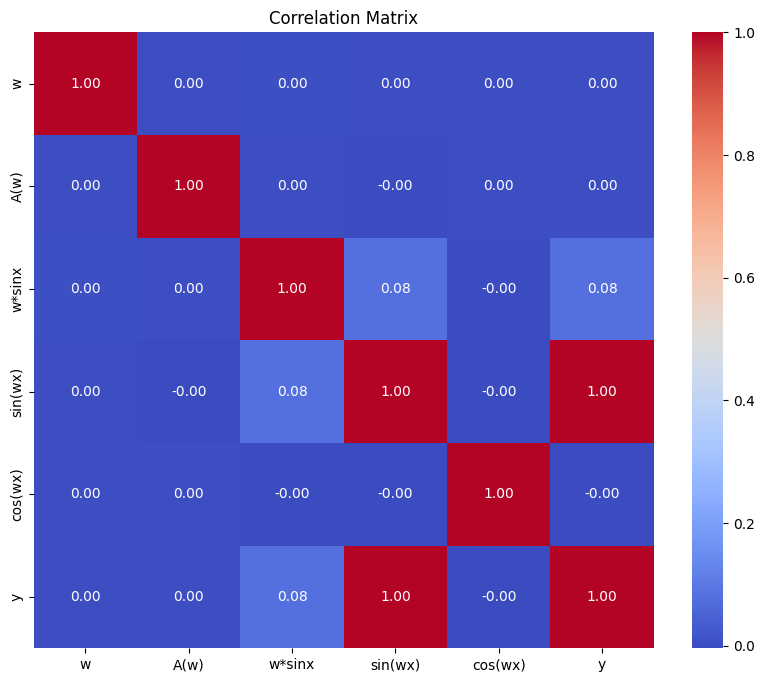

In [67]:
correlation_matrix = df_sample[['w','A(w)', 'w*sinx', 'sin(wx)', 'cos(wx)','y']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Realised that y = Asin(wx) + k as I initially assumed since k is constant it wont matter....but by doing A = y/sin(wx) + k/sin(wx) we see that the term k/sin(wx) Also contributes to the std; but cant be Asin(wx+k) as = A(sin(wx)cos(k)+cos(wx)sin(k)) but corr (y, cos(wx)) = 0

# Fitting a model to find A and k 

In [53]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = np.array(df_sample['sin(wx)'])
y = np.array(df_sample['y'])
X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    shuffle=True,   
)

In [54]:
X_train = X_train.reshape(-1, 1)
X_val = X_val.reshape(-1, 1)

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg = LinearRegression().fit(X_train, y_train)
preds = reg.predict(X_val)
mse = mean_squared_error(y_val, preds, squared=True)
rmse = mean_squared_error(y_val, preds, squared=False)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MSE: 0.002498598178647435
RMSE: 0.049985979820820106


In [56]:
reg.coef_, reg.intercept_

(array([1.00006263]), 0.00011567932554044252)

In [57]:
df_sample['new A'] = (df_sample['y'] - reg.intercept_)/ df_sample['sin(wx)']
df_sample[['w', 'x', 'y', 'A', 'new A']].describe()

,w,x,y,A,new A
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,-0.002645,0.010316,-0.001470,0.879587,0.878479
std,1.658998,5.771007,0.709493,45.391692,45.593244
min,-2.500000,-9.999859,-1.171741,-11953.561320,-12030.025704
25%,-1.500000,-4.955041,-0.707808,0.944546,0.944520
50%,-0.500000,0.000709,-0.004312,1.000189,1.000212
75%,1.500000,5.008119,0.706087,1.056295,1.056294
max,2.500000,9.999514,1.170790,4746.014490,4735.517743


## So the std did not change...this means that some noise is getting shot up when we take the ratio with y in numerator and sin(wx) in denominator

In [58]:
df_sample['y - sin(wx)'] = (df_sample['y'] - (reg.coef_*df_sample['sin(wx)'] + reg.intercept_))
df_sample[['w', 'x', 'y', 'A', 'new A', 'y - sin(wx)']].describe()

,w,x,y,A,new A,y - sin(wx)
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,-0.002645,0.010316,-0.001470,0.879587,0.878479,8.843377e-06
std,1.658998,5.771007,0.709493,45.391692,45.593244,4.996901e-02
min,-2.500000,-9.999859,-1.171741,-11953.561320,-12030.025704,-2.131220e-01
25%,-1.500000,-4.955041,-0.707808,0.944546,0.944520,-3.382320e-02
50%,-0.500000,0.000709,-0.004312,1.000189,1.000212,4.473882e-07
75%,1.500000,5.008119,0.706087,1.056295,1.056294,3.371154e-02
max,2.500000,9.999514,1.170790,4746.014490,4735.517743,2.224269e-01


# This shows that y = Asinwx + k is indeed a good measure.

In [59]:
test_df = pd.read_csv("/kaggle/input/regression/test_data.csv")

In [66]:
len(test_df)

100000000

In [61]:
X_test = np.array(np.sin(test_df['w']*test_df['x']))
X_test = X_test.reshape(-1, 1)

In [62]:
test_df['y_predictions'] = reg.predict(X_test)

In [63]:
test_df.head()

,w,x,y_predictions
0,-2.5,-20.640539,0.972707
1,-2.5,21.636451,0.632094
2,-2.5,-16.856414,-0.963591
3,-2.5,89.961916,0.960978
4,-2.5,13.535599,-0.658199


In [68]:
import pandas as pd

test_df.to_csv('output.csv', index=False)  

### Could not find anything else. plotted lot more graphs, which mislead me to  a lot of places, example:

<Axes: xlabel='sinx', ylabel='y'>

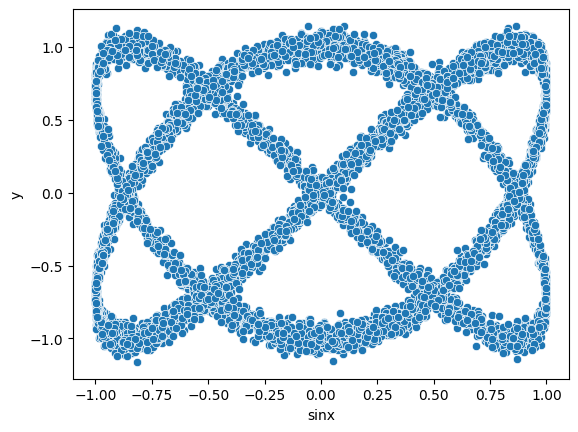

In [69]:
sns.scatterplot(data = df_sample[df_sample['w'] == -1.5], x = 'sinx', y = 'y')

#### but after trying to find equations that describe this graph finally realised that when w changes, y wont be related linearly with sinx, instead with sin(-1.5x)

# Test Results Visualization

In [71]:
test_sample = test_df.sample(n=100000)

In [73]:
test_sample["sin(wx)"] = np.sin(test_sample["x"]* test_sample["w"])

<Axes: xlabel='sin(wx)', ylabel='y_predictions'>

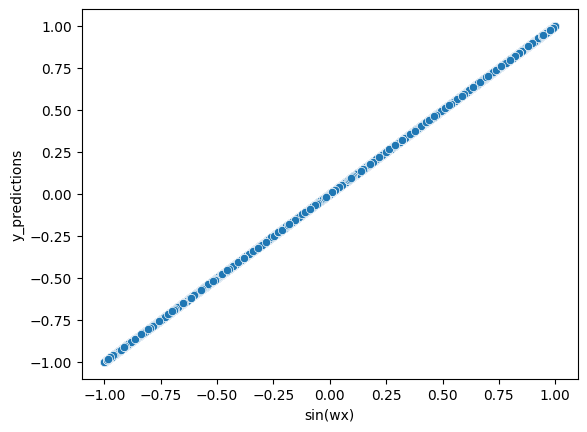

In [74]:
sns.scatterplot(data = test_sample[test_sample['w'] == 1], x = 'sin(wx)', y = 'y_predictions')